In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from spatial_manifolds.detect_grids import *
from spatial_manifolds.brainrender_helper import *

In [2]:
fig_path = '/Users/harryclark/Documents/figs/FIGURE1/'
mouse = 29
day = 23

# good examples include 
#mice = [25, 25, 26, 27, 29, 28]
#days = [25, 24, 18, 26, 23, 25]

In [ ]:
Mouse = f'M{mouse}'
data_paths = [f"/Users/harryclark/Documents/brainrender/probe_data/{Mouse}_probe_locations_{a}.mat" for a in [1,2,3,4]]
shank_offsets_SC = pd.read_csv('/Users/harryclark/Documents/brainrender/probe_data/shank_offsets.csv')
clusters_df = pd.read_csv(f'/Users/harryclark/Documents/brainrender/probe_data/extremum_channel_locations_kilosort4_0.csv')
clusters_df = clusters_df[clusters_df['mouse'] == mouse]
shank_offsets_SC = shank_offsets_SC[shank_offsets_SC['mouse'] == mouse]
clusters_df = reconstruct_shank_id(clusters_df, mouse)
probes_locs = [read_probe_mat(data_path) for data_path in data_paths]
adjusted_probes_locs_CCF = np.array([adjust_probe_locs(probe_locs) for probe_locs in probes_locs])
adjusted_probe_locs_SC, adjusted_probe_locs_CCF = correct_for_left_side(adjusted_probes_locs_CCF)
adjusted_probe_locs_SC, adjusted_probe_locs_CCF = adjust_to_shank_offsets(adjusted_probe_locs_SC, shank_offsets_SC)

ymin = -300; ymax = 3000
xmin = -200; xmax = 1000
xs = np.arange(xmin, xmax, 1)
ys = np.arange(ymin, ymax, 1)
loc_annotations = np.empty((3300, 1200), dtype=object)
loc_colors = np.zeros((3300, 1200, 4), dtype=np.int64)
X, Y = np.meshgrid(xs, ys)

for yi, y in enumerate(ys):
    for xi, x in enumerate(xs):
        coord_SC, coord_CCF  = brain_coord_from_xy(x, y, adjusted_probe_locs_SC, shank_id=0)
        # use the CCF coordinates, get an index and look up the annotation in the brainrender allen_brain_10um volume
        z_CCF, y_CCF, x_CCF = np.round(coord_CCF/10).astype(int)
        annotation_index = annotations_set[z_CCF,y_CCF,x_CCF]
        if len(structure_set[structure_set['id'] == annotation_index]) ==1:
            cluster_annotation = structure_set[structure_set['id'] == annotation_index]['acronym'].iloc[0]
        else:
            cluster_annotation ='root' # out of brain
        loc_annotations[yi,xi] = cluster_annotation
        loc_colors[yi,xi] = get_annotation_colors([cluster_annotation])[0]

# Create border masks for each color
loc_colors = np.array(loc_colors, dtype=np.int64)
pixels = loc_colors.reshape(-1, loc_colors.shape[2])

# Find unique colors
unique_colors = np.unique(pixels, axis=0)
unique_annotations = np.unique(loc_annotations)


/Users/harryclark/Downloads/kilosort4_sa
last_ephys_bin 19300
last_ephys_time_bin 2815.205
29 16
there are 69 cells to begin with
I wont use these brain regions
['FL', 'PFL', 'SIM', 'arb', 'root']
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
Cell from root being removed
there are 35 non_grid and non_spatial_cells
there are 5 grid_cells
there are 25 non grid spatial cells
there are 10 non spatial cells
there are 16 speed cells
there are 56 cells
last_ephys_bin 19300
last_ephys_time_bin 2815.205
last_ephys_bin 14700
last_ephys_time_bin 1924.675
29 23
there are 211 cells to begin with
I wont use these brain regions
['FL', 'PFL', 'SIM', 'arb', 'root']
there are 143 non_grid and non_spatial_ce

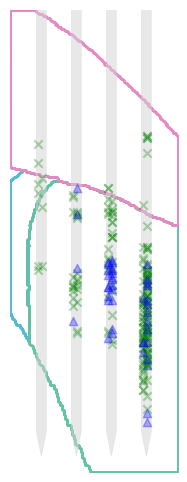

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 6))
for color in unique_colors:
    border_points = extract_border(loc_colors, color)
    if not np.all(color == np.array([255, 255, 255, 255])):
        plt.scatter(xs[border_points[:,1]],
                    ys[border_points[:,0]], c=[color/255], s=0.05)
plot_NP2_probe(ax, sorting_analyzer_path='/Users/harryclark/Downloads/kilosort4_sa')

for day in [16,23,18]:
    gcs, ngs, ns, sc, ngs_ns, all = cell_classification_of1(mouse, day, percentile_threshold=99) # subset
    _,_,_,_,_,clusters_VR = compute_vr_tcs(mouse, day)

    # plot non grid spatial cell locations 
    xs = clusters_VR[ngs.cluster_id.values].coord_probe_x.values
    ys = clusters_VR[ngs.cluster_id.values].coord_probe_y.values
    plt.scatter(xs, ys, marker='x', color='green', alpha=0.3)

    # plot grid cell locations 
    xs = clusters_VR[gcs.cluster_id.values].coord_probe_x.values
    ys = clusters_VR[gcs.cluster_id.values].coord_probe_y.values
    plt.scatter(xs, ys, marker='^', color='blue', alpha=0.3)

ax.axis('off')
plt.show()


/Users/harryclark/Downloads/kilosort4_sa
last_ephys_bin 18300
last_ephys_time_bin 2133.535066667
29 19
there are 136 cells to begin with
I wont use these brain regions
['FL', 'PFL', 'SIM', 'arb', 'root']
there are 90 non_grid and non_spatial_cells
there are 13 grid_cells
there are 53 non grid spatial cells
there are 37 non spatial cells
there are 33 speed cells
there are 136 cells
last_ephys_bin 18300
last_ephys_time_bin 2133.535066667
last_ephys_bin 17100
last_ephys_time_bin 2107.175
29 20
there are 245 cells to begin with
I wont use these brain regions
['FL', 'PFL', 'SIM', 'arb', 'root']
Cell from root being removed
Cell from root being removed
there are 181 non_grid and non_spatial_cells
there are 17 grid_cells
there are 135 non grid spatial cells
there are 46 non spatial cells
there are 45 speed cells
there are 243 cells
last_ephys_bin 17100
last_ephys_time_bin 2107.175
last_ephys_bin 20200
last_ephys_time_bin 2074.745033333
29 21
there are 159 cells to begin with
I wont use these 

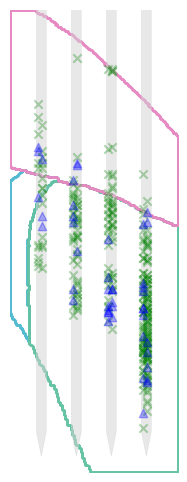

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 6))
xs = np.arange(xmin, xmax, 1)
ys = np.arange(ymin, ymax, 1)
for color in unique_colors:
    border_points = extract_border(loc_colors, color)
    if not np.all(color == np.array([255, 255, 255, 255])):
        plt.scatter(xs[border_points[:,1]],
                    ys[border_points[:,0]], c=[color/255], s=0.05)
plot_NP2_probe(ax, sorting_analyzer_path='/Users/harryclark/Downloads/kilosort4_sa')

for day in [19,20,21,22]:
    gcs, ngs, ns, sc, ngs_ns, all = cell_classification_of1(mouse, day, percentile_threshold=99) # subset
    _,_,_,_,_,clusters_VR = compute_vr_tcs(mouse, day)

    # plot non grid spatial cell locations 
    xs = clusters_VR[ngs.cluster_id.values].coord_probe_x.values
    ys = clusters_VR[ngs.cluster_id.values].coord_probe_y.values
    plt.scatter(xs, ys, marker='x', color='green', alpha=0.3)

    # plot grid cell locations 
    xs = clusters_VR[gcs.cluster_id.values].coord_probe_x.values
    ys = clusters_VR[gcs.cluster_id.values].coord_probe_y.values
    plt.scatter(xs, ys, marker='^', color='blue', alpha=0.3)

ax.axis('off')
plt.show()


In [5]:
gcs

,cluster_id,null_grid_score,null_field_size,null_field_spacing,null_orientation,grid_score,field_size,field_spacing,orientation,sig,travel,brain_region,SC_x,SC_y,SC_z,probe_x,probe_y
0,106,None,None,None,None,0.645713,34.119405,45.492540,59.192577,True,15.0,ENTm2,-3000.0,2467.740268,4297.689684,282.0,1545.0
1,148,None,None,None,None,0.695490,26.087300,34.783067,53.463780,True,31.0,PAR,-3000.0,2287.786607,4301.773807,282.0,1725.0
